In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import cmocean
import matplotlib.pyplot as plt
from OpenVisus import *
from backend_v2 import *

Starting OpenVisus /Users/aashishpanta/opt/anaconda3/lib/python3.9/site-packages/OpenVisus/__init__.py 3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ] sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0) ...


In [2]:
data = xr.open_dataset('20190426120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc')
data=data.drop('time')
# a=ds['analysed_sst'][0].values
# ds.dims
data=data.squeeze('time')
data

<xarray.Dataset>
Dimensions:           (lat: 720, lon: 1440)
Coordinates:
  * lat               (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon               (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    analysed_sst      (lat, lon) float32 ...
    analysis_error    (lat, lon) float32 ...
    sea_ice_fraction  (lat, lon) float32 ...
    mask              (lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.6,ACDD-1.3
    title:                      Analysed foundation sea surface temperature o...
    summary:                    A merged, multi-sensor L4 foundation SST prod...
    references:                 http://www.remss.com/measurements/sea-surface...
    institution:                REMSS
    history:                    2019-05-30 18:27:13-0700 created by fuse_sens...
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_email:            ghrsst-po@nceo.ac.uk
    publisher_url:              http://www.ghrsst.org
    processing_level:           L4
    cdm_data_type:              grid

In [3]:
filename='dummy.idx'
field=[Field('analysed_sst', 'float32'),
      Field('analysis_error', 'float32'),
      Field('sea_ice_fraction', 'float32'),
      Field('mask', 'float32')]

In [4]:
db=CreateIdx(url=filename,dims=[1440,720],fields=field)
print(db.getDatasetBody().toString())

<dataset url="dummy.idx" typename="IdxDataset">
	<idxfile>
		<version value="6" />
		<bitmask value="V001010101010101010101" />
		<box value="0 1440 0 720" />
		<bitsperblock value="16" />
		<blocksperfile value="32" />
		<block_interleaving value="0" />
		<filename_template value="./dummy/%04x.bin" />
		<missing_blocks value="False" />
		<time_template value="" />
		<field name="analysed_sst" description="" index="" default_compression="" default_layout="" default_value="0" filter="" dtype="float32" />
		<field name="analysis_error" description="" index="" default_compression="" default_layout="" default_value="0" filter="" dtype="float32" />
		<field name="sea_ice_fraction" description="" index="" default_compression="" default_layout="" default_value="0" filter="" dtype="float32" />
		<field name="mask" description="" index="" default_compression="" default_layout="" default_value="0" filter="" dtype="float32" />
		<timestep when="0" />
	</idxfile>
</dataset>


In [5]:
# db.getFields()
timesteps=[int(it) for it in db.getTimesteps().asVector()]
 
for f in db.getFields():
    db.write(data[f].values, field=f)
db.getLogicSize()

array([1440,  720])

In [6]:
ds = xr.open_dataset("dummy.idx",engine=OpenVisusBackendEntrypoint,dims=data.dims,coords=data.coords )
ds['analysed_sst']
# ds['x']=ds.lon
# ds['y']=ds.lat
ds

Adding field  analysed_sst shape  [720, 1440] dtype  float32 labels  ['lat', 'lon'] timesteps  [0] Max Resolution  21
Adding field  analysis_error shape  [720, 1440] dtype  float32 labels  ['lat', 'lon'] timesteps  [0] Max Resolution  21
Adding field  sea_ice_fraction shape  [720, 1440] dtype  float32 labels  ['lat', 'lon'] timesteps  [0] Max Resolution  21
Adding field  mask shape  [720, 1440] dtype  float32 labels  ['lat', 'lon'] timesteps  [0] Max Resolution  21


<xarray.Dataset>
Dimensions:           (lat: 720, lon: 1440)
Coordinates:
  * lat               (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon               (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    analysed_sst      (lat, lon) float32 ...
    analysis_error    (lat, lon) float32 ...
    sea_ice_fraction  (lat, lon) float32 ...
    mask              (lat, lon) float32 ...

In [7]:
ds.coords

Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9

In [8]:
d=ds.isel(lat=slice(0,720),lon=slice(0,1440))
d.analysed_sst

<xarray.DataArray 'analysed_sst' (lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9

_raw_indexing_method key (slice(0, 720, 1), slice(0, 1440, 1))


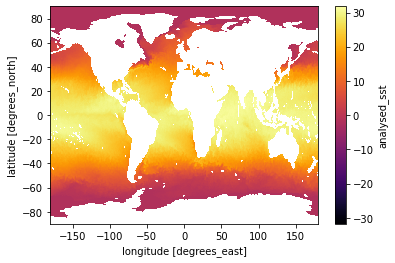

In [9]:
(d.analysed_sst-273.15).plot(cmap='inferno')

In [10]:
ds_sst = d.analysed_sst - 273.15
ds_sst

<xarray.DataArray 'analysed_sst' (lat: 720, lon: 1440)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878, -1.7999878,
        -1.7999878],
       [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878, -1.7999878,
        -1.7999878],
       [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878, -1.7999878,
        -1.7999878]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9

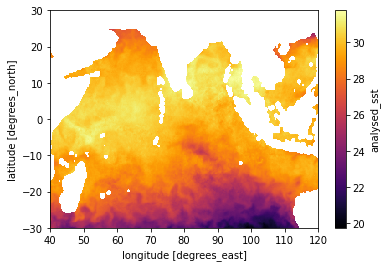

In [11]:
ds_sst.sel(lon=slice(40,120),lat=slice(-30,30)).plot(cmap='inferno')